# ECE 685D, Fall 2020 
## Problem Set 2 

## Full name: Vinayak Gupta


### Problem 2 (Gaussian Mixture Model)

In [1]:
# Put your code here 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import mixture

In [2]:
np.random.seed(42)
mean_1 = [0, 0]
cov_1 = [[0.2, 0.1], [0.1, 0.2]] 

mean_2 = [0, 2]
cov_2 = [[0.1, -0.15], [-0.15, 0.3]]

mean_3 = [2, 0]
cov_3 = [[0.3, 0.05], [0.05, 0.3]]

mean_4 = [2, 2]
cov_4 = [[0.15, 0], [0, 0.15]]

p = [0.125,0.125,0.25,0.5]

num_samples=1000

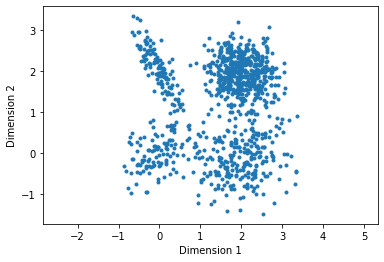

In [3]:
#Generate 1000 2-d GMM samples
x_1, y_1 = np.random.multivariate_normal(mean_1, cov_1, num_samples).T
x_2, y_2 = np.random.multivariate_normal(mean_2, cov_2, num_samples).T
x_3, y_3 = np.random.multivariate_normal(mean_3, cov_3, num_samples).T
x_4, y_4 = np.random.multivariate_normal(mean_4, cov_4, num_samples).T
x=[]
y=[]
#print(x_1,y_1)
#print(x_2,y_2)
#print(x_3,y_3)
#print(x_4,y_4)
for i in range(num_samples):
    choice = np.random.choice([1,2,3,4],p = p)
    if choice == 1:
        x.append(x_1[i])
        y.append(y_1[i])
    elif choice == 2:
        x.append(x_2[i])
        y.append(y_2[i])
    elif choice == 3:
        x.append(x_3[i])
        y.append(y_3[i])
    else:
        x.append(x_4[i])
        y.append(y_4[i])
#print(x,y)
plt.plot(x, y, '.')
plt.xlabel('Dimension 1', fontsize=10)
plt.ylabel('Dimension 2', fontsize=10)
plt.axis('equal')

plt.show()

In [4]:
data = [[x[i],y[i]] for i in range(len(x))]
log_likeli = []
num_comp=[]

In [5]:
#Fitting GMM to the above generated data
for i in range(1,8):
    num_comp.append(i)
    g = mixture.GaussianMixture(n_components=i,covariance_type='full',random_state=0)
    g.fit(data)
    log_likeli.append(g.score(data))

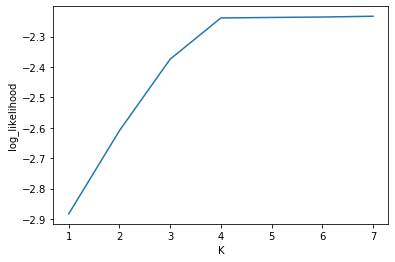

In [6]:
plt.plot(num_comp,log_likeli)
plt.xlabel('K', fontsize=10)
plt.ylabel('log_likelihood', fontsize=10)
plt.show()

**After K=4, the log likelihood almost becomes constant**

### Problem 3 (Bayesian Linear Regression)

**Part C**

In [7]:
N=10

mean_0 = [0.5, 0.5]
sigma_0 = [[0.1, 0], [0, 0.1]]

x = [1.5, 1.5]
sigma_y = [[0.2, 0.1], [0.1, 0.1]]

y_i = np.random.multivariate_normal(x, sigma_y, N)
sum_y = y_i.sum(axis=0)

In [8]:
def gen_contour(mean_0, sigma_0,title):
    prior_x1,prior_x2 = np.random.multivariate_normal(mean_0, sigma_0, 100000).T
    plt.hist2d(prior_x1,prior_x2,bins=[100,100])
    plt.title(title)
    plt.xlabel('Dimension 1', fontsize=10)
    plt.ylabel('Dimension 2', fontsize=10)
    plt.colorbar()
    plt.show()

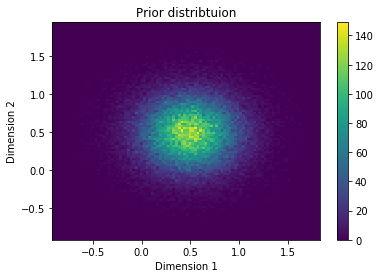

In [9]:
gen_contour(mean_0, sigma_0,"Prior distribtuion")

In [10]:
sigma_0_inv = np.linalg.inv(sigma_0)
sigma_y_inv = np.linalg.inv(sigma_y)
sigma_post = np.linalg.inv(sigma_y_inv*N+ sigma_0_inv)
mean_post = np.matmul(np.matmul(sigma_post,sigma_0_inv),mean_0) + np.matmul(np.matmul(sigma_post,sigma_y_inv),sum_y)

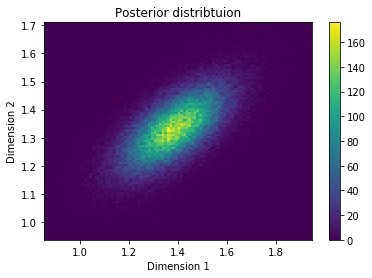

In [11]:
gen_contour(mean_post, sigma_post,"Posterior distribtuion")

**Part D**

**sigma_0 = [[10, 0], [0, 10]]**

In [12]:
sigma_0 = [[10, 0], [0, 10]]

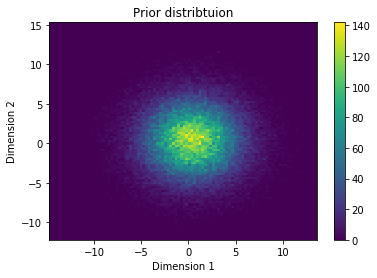

In [13]:
gen_contour(mean_0, sigma_0,"Prior distribtuion")

In [14]:
sigma_0_inv = np.linalg.inv(sigma_0)
sigma_y_inv = np.linalg.inv(sigma_y)
sigma_post = np.linalg.inv(sigma_y_inv*N+ sigma_0_inv)
mean_post = np.matmul(np.matmul(sigma_post,sigma_0_inv),mean_0) + np.matmul(np.matmul(sigma_post,sigma_y_inv),sum_y)

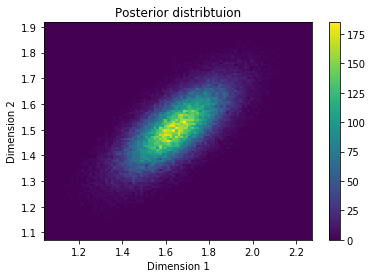

In [15]:
gen_contour(mean_post, sigma_post,"Posterior distribtuion")

**sigma_0 = [[0.1, 0], [0, 0.1]]**


**N=100**

In [16]:
sigma_0 = [[0.1, 0], [0, 0.1]]
N=100
y_i = np.random.multivariate_normal(x, sigma_y, N)
sum_y = y_i.sum(axis=0)

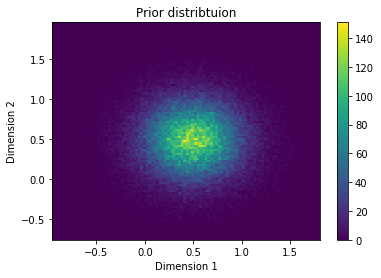

In [17]:
gen_contour(mean_0, sigma_0,"Prior distribtuion")

In [18]:
sigma_0_inv = np.linalg.inv(sigma_0)
sigma_y_inv = np.linalg.inv(sigma_y)
sigma_post = np.linalg.inv(sigma_y_inv*N+ sigma_0_inv)
mean_post = np.matmul(np.matmul(sigma_post,sigma_0_inv),mean_0) + np.matmul(np.matmul(sigma_post,sigma_y_inv),sum_y)

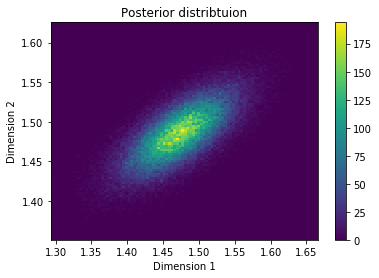

In [19]:
gen_contour(mean_post, sigma_post,"Posterior distribtuion")

**Part E**

From the above graphs, we can see how the posterior probability changes as the variance of the prior changes as well as the number of sensors present. 

When the variance of prior is high, the posterior distribution varies much more and is further away from the location of x that we come to know of from the sensors. Our estimates are therefore not as accurate since there is a lot of uncertainity in the prior information.

Whereas when the number of sensors are higher (keeping the variance of prior same as before), we are better able to update the posterior according to the data that we just found and our estimates are much accurate.

### Problem 4 (Bias-variance trade-off)

In [20]:
# Put your code here 
import math
from sklearn.linear_model import Ridge
import warnings
warnings.simplefilter('ignore', np.RankWarning)
warnings.simplefilter('ignore', np.ComplexWarning)
warnings.filterwarnings('ignore', "Intel MKL ERROR")

In [21]:
x_train = np.linspace(0, 1, num=5, endpoint=False)
y_train= np.array([ math.sin(2 * math.pi * x)+math.cos(4 * math.pi * x) for x in x_train])
x_test = np.linspace(0, 1, num=100, endpoint=False)
y_test = np.array([ math.sin(2 * math.pi * x)+math.cos(4 * math.pi * x) for x in x_test])
degree=[]
train_error=[]
test_error =[]

In [22]:
#Polynomial fitting without regularization
for i in range(16):
    degree.append(i)
    fit_fun = np.polyfit(x_train,y_train,i)
    y_train_pred = np.polyval(fit_fun,x_train)
    y_test_pred = np.polyval(fit_fun,x_test)
    residual_train = np.sum((y_train-y_train_pred)**2)
    residual_test = np.sum((y_test-y_test_pred)**2)
    train_error.append(residual_train)
    test_error.append(residual_test)

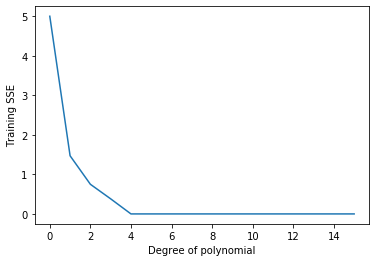

In [23]:
plt.plot(degree,train_error)
plt.xlabel('Degree of polynomial', fontsize=10)
plt.ylabel('Training SSE', fontsize=10)
plt.show()

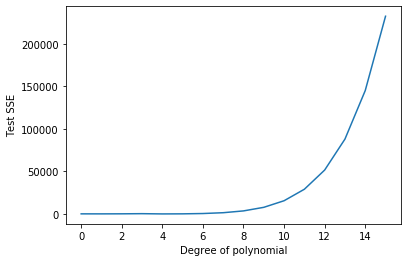

In [24]:
plt.plot(degree,test_error)
plt.xlabel('Degree of polynomial', fontsize=10)
plt.ylabel('Test SSE', fontsize=10)
plt.show()

**This is basically the problem of overfitting in the data. With higher degree, the curve oscillates more and returns bogus results on new data**

In [25]:
#create a custom training data of degree upto 14 using the current training data
reg_x_train = [[i**j for j in range(15)] for i in x_train]
reg_x_test= [[i**j for j in range(15)] for i in x_test]
lambda_val = np.linspace(0.01, 50, num=1000)
reg_train_error=[]
reg_test_error =[]

In [26]:
#Polynomial fitting with regularization
for i in lambda_val:
    clf = Ridge(alpha=i)
    clf.fit(reg_x_train, y_train)
    reg_y_train_pred = clf.predict(reg_x_train)
    reg_y_test_pred = clf.predict(reg_x_test)
    #reg_wt = i*(np.linalg.norm([clf.coef_])**2)
    reg_residual_train = np.sum((y_train-reg_y_train_pred)**2)
    reg_residual_test = np.sum((y_test-reg_y_test_pred)**2)
    reg_train_error.append(reg_residual_train)
    reg_test_error.append(reg_residual_test)

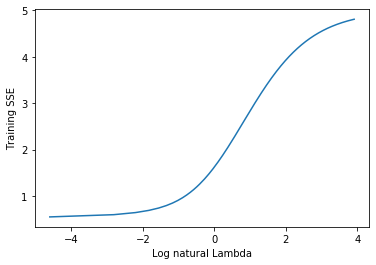

In [27]:
plt.plot([np.log(i) for i in lambda_val],reg_train_error)
plt.xlabel('Log natural Lambda', fontsize=10)
plt.ylabel('Training SSE', fontsize=10)
plt.show()

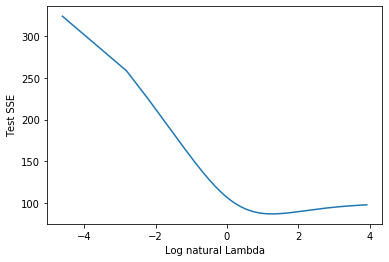

In [28]:
plt.plot([np.log(i) for i in lambda_val],reg_test_error)
plt.xlabel('Log natural Lambda', fontsize=10)
plt.ylabel('Test SSE', fontsize=10)
plt.show()

**These graph makes sense as due to increase in lambda (higher regularization), the weights are not unnecessarily assigned to higher degree coefficients**

### Problem 6 (Nonlinear Basis Functions)

In [29]:
# Put your code here 
mean_1 = [0, 0]
cov_1 = [[0.1, 0], [0, 0.1]] 

mean_21 = [-1, -1]
cov_21 = [[0.1, 0], [0, 0.1]]

mean_22 = [1, 1]
cov_22 = [[0.1, 0], [0, 0.1]]

p=[0.5,0.5]

In [30]:
x1, y1 = np.random.multivariate_normal(mean_1, cov_1, 100).T
x_21, y_21 = np.random.multivariate_normal(mean_21, cov_21, 200).T
x_22, y_22 = np.random.multivariate_normal(mean_22, cov_22, 200).T
x2=[]
y2=[]

for i in range(200):
    choice = np.random.choice([1,2],p = p)
    if choice == 1:
        x2.append(x_21[i])
        y2.append(y_21[i])
    else:
        x2.append(x_22[i])
        y2.append(y_22[i])

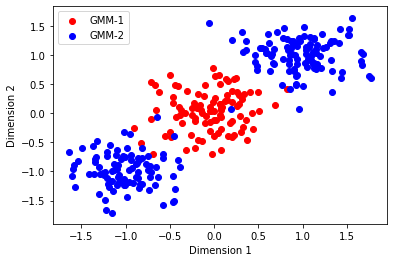

In [31]:
plt.scatter(x1, y1,color='r',label='GMM-1')
plt.scatter(x2, y2,color='b',label='GMM-2')
plt.xlabel('Dimension 1', fontsize=10)
plt.ylabel('Dimension 2', fontsize=10)
plt.legend()
plt.show()

**No there does not exist a single line to separate the 2 datasets**

In [32]:
def phi_calc(x,y,mu):
    x = [i -mu[0] for i in x ]
    y = [i -mu[1] for i in y ]
    data = [math.exp(-0.5*(x[i]**2 + y[i]**2)) for i in range(len(x))]
    return data

In [33]:
transformed_x1 = phi_calc(x1,y1,mean_1)
transformed_y1 = phi_calc(x1,y1,mean_21)

transformed_x2 = phi_calc(x2,y2,mean_1)
transformed_y2 = phi_calc(x2,y2,mean_21)

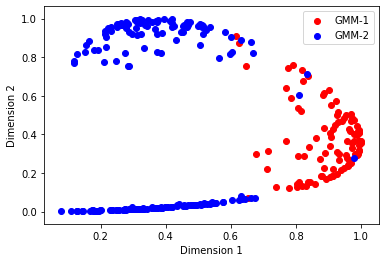

In [34]:
plt.scatter(transformed_x1, transformed_y1,color='r',label='GMM-1')
plt.scatter(transformed_x2,transformed_y2,color='b',label='GMM-2')
plt.xlabel('Dimension 1', fontsize=10)
plt.ylabel('Dimension 2', fontsize=10)
plt.legend()
plt.show()

**The 2 data sets can almost be separated by a single line (there are some points from the 2 datasets on either side but it is almost linearly separable). This happens because for GMM2 the mean of individual distribution is centered equally far from 0,0 and also the covariance matrices are same for GMM-1 and 2 components of GMM-2**